<a href="https://colab.research.google.com/github/mdrahmed/Dog_cat_image_classification/blob/main/Dog_cat_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# keras import data loading
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalization to scale the size, it gets overfitted without rescaling
def rescale_images(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(rescale_images)
test_ds = test_ds.map(rescale_images)

In [9]:
# Creating CNN model
model = Sequential()

# 32 filters
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 64 filters
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 128 filters
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
# previously it was overfitting without this
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# compiling with loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# with 3/10 epochs, purpose is to reduce the margin of error
history = model.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2645s 4s/step - accuracy: 0.7147 - loss: 0.5974 - val_accuracy: 0.7270 - val_loss: 0.5416
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2605s 4s/step - accuracy: 0.7942 - loss: 0.4401 - val_accuracy: 0.7776 - val_loss: 0.4852
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2580s 4s/step - accuracy: 0.8392 - loss: 0.3604 - val_accuracy: 0.7850 - val_loss: 0.4830


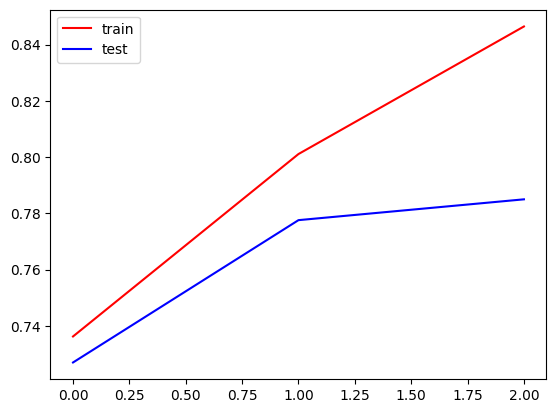

In [16]:
import matplotlib.pyplot as plt
# accuracy - should go higher step by step
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

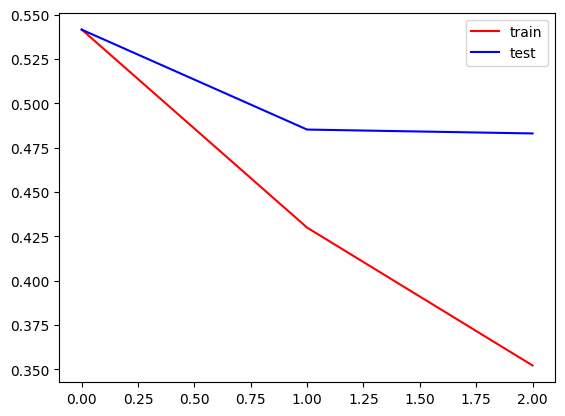

In [17]:
# loss - margin or error should go down at every step
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

# Test with real data

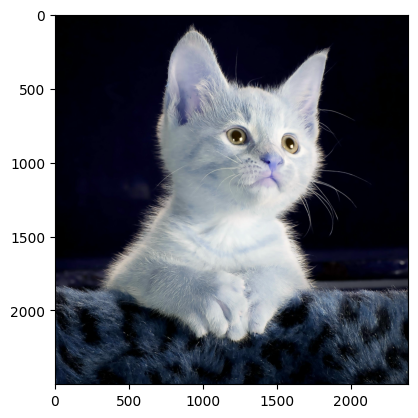

In [19]:
import cv2

test_img = cv2.imread('/content/test_cat.jpeg')
plt.imshow(test_img)

In [21]:
test_img.shape

(2500, 2392, 3)

In [25]:
test_img = test_img.reshape(1,256,256,3)
test_img = test_img.reshape(1,256,256,3)

# prediction will be shown by the order of uploading
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.]], dtype=float32)